# iris data set

Playing around with ideas from [Hands on with Machine Learning][1491962291].

The [github repo][handson-ml] that goes along with the book has a number of 
examples showing numpy, matplotlib, and pandas in jupyter notebooks.

Jim Mahoney | MIT License | Summer 2018 | cs.marlboro.college

[1491962291]: https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow-ebook/dp/B06XNKV5TS
[handson-ml]: https://github.com/jimmahoney/handson-ml

## libraries and functions

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import numpy as np
from numpy import *
import pandas as pd
import hashlib

% matplotlib inline

def myplot(x, y, pointstyle=False,
           x2=False, y2=False, pointstyle2=False,
           title='', xlabel='', ylabel='', 
           xlimits=False, ylimits=False, 
           grid=False, width=4, height=2, dpi=218, 
           savefile=False):
    """ An API for making a plot with the matplotlib library. """
    # other options that I might want in the future :
    #    semilogx(x,y), semilogy(x,y), loglog(x,y),
    figure = plt.figure(dpi=dpi, figsize=(width, height)) # in inches
    axis = figure.add_subplot(111) # 111 means (rows,cols,which) i.e. 1x1 #1 
    if pointstyle:
        axis.plot(x, y, pointstyle) # i.e. 'ro' for red circles
    else:
        axis.plot(x, y)
    if pointstyle2:
        axis.plot(x2, y2, pointstyle2)
    axis.set(xlabel=xlabel, ylabel=ylabel, title=title)
    if grid:
        axis.grid()
    if savefile:
        figure.savefig(savefile)  # i.e. savefile='myplot.png'
    if xlimits:
        axes.set_xlim(xlimits) # i.e. xlimits=(0,10)
    if ylimits:
        axes.set_ylim(ylimits)
    plt.show()

# Make the random routines behave the same each time
# this notebook is loaded.
np.random.seed(42)

## a sample plot

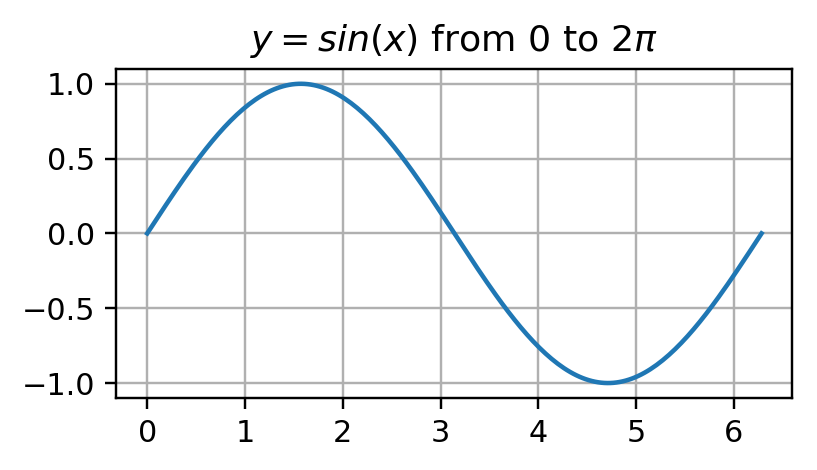

In [2]:
x = np.linspace(0, 2*pi, 200) # 200 points evenly spaced from 0 to 2*pi
myplot(x, sin(x), grid=True, title='$y=sin(x)$ from 0 to $2\pi$')

## A sample data set - Iris

This is a [classic set of data][iriswiki], just to illustrate some a few data manipulations. Google "iris csv" for [sources][iriscsv]. I downloaded iris.csv manualy and put it in the datasets/ folder.

[iriswiki]: https://en.wikipedia.org/wiki/Iris_flower_data_set
[iriscsv]: https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv

In [3]:
iris = pd.read_csv('datasets/iris.csv')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
iris[2:5] # rows

sepal_length  sepal_width  petal_length  petal_width species
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [6]:
iris['sepal_length'][2:5] # column, rows

2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [7]:
mean(iris.sepal_length)  # or use column name as an attribute

5.843333333333334

In [8]:
virginica = iris[ iris.species=='virginica' ] # select one species.

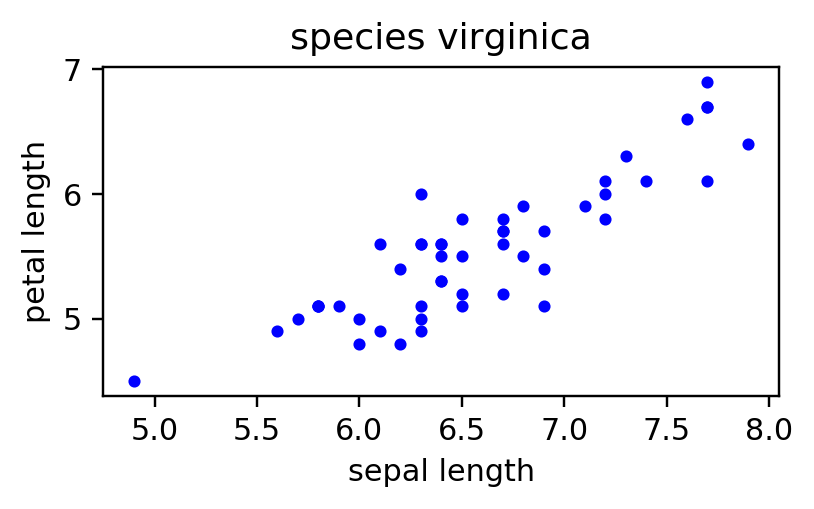

In [9]:
myplot(x=virginica.sepal_length, y=virginica.petal_length, pointstyle='b.',
       xlabel='sepal length', ylabel='petal length', title='species virginica')

## machine learning (so to speak) on the iris data

Now I'll do an example of the learning protocol described in the "Hands on ..." book, without yet using the scikitlearn pipelines but instead using numpy to implement the basic idea.

We're looking only at the virginica species looking at the relation between petal length and sepal length - one piece of the data chosen arbitrarily.

The plot above shows that this looks roughly linear and so I'll use that for the model, namely

$$ petal = a * sepal + b $$

where (a, b) are the slope and intercept of the linear model. Numpy has (polyfit, polyval) functions which will find and apply the model, which will be treated just as a black box though in this simple case the linear fit math to do everything explicitly is well understood.

```
 fit = np.polyfit(x, y, deg=1)   # fit=[a,b], a linear model of the arrays of values.
 y = np.polyval(fit, x)          # find values y = a * x + b where fit=[a,b]

```





In [10]:
def performance(x, y, fit):
    """ Return the preformance measure of the fit=[a,b] linear 
        model on some x, y data values.
    """
    n = len(x)
    assert n == len(y)
    y_model = np.polyval(fit, x)
    return sqrt( sum( (y_model - y)**2 ) / n )

def perfs(training, testing, fit):
    """ Return the performannces of two data sets. """
    x_train = training.sepal_length
    y_train = training.petal_length
    x_test = testing.sepal_length
    y_test = testing.petal_length
    return (performance(x_train, y_train, fit),
            performance(x_test, y_test, fit) )

First step is to divide the data into training and testing sets, about 80% and 20%, 
which I'll do with integer indeces.

In [11]:
n_virginica = len(virginica)
index_training = sorted(np.random.choice(range(n_virginica), int(0.8*n_virginica), replace=False)) # 80% training
index_testing = sorted(list(set(range(len(virginica))) - set(index_training)))                           # 20% testing
virginica_training = virginica.iloc[ index_training ]
virginica_testing = virginica.iloc[ index_testing ]

Here's what those two sets look like.

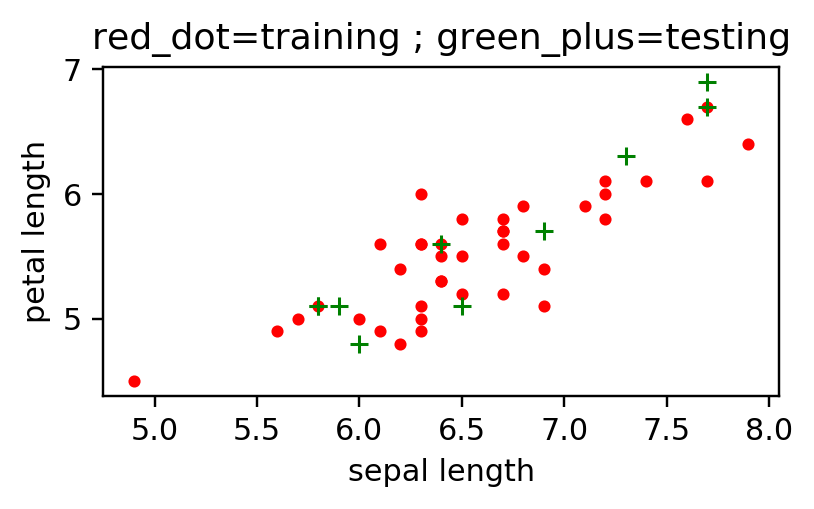

In [12]:
myplot(x=virginica_training.sepal_length, y=virginica_training.petal_length, pointstyle='r.',
       x2=virginica_testing.sepal_length, y2=virginica_testing.petal_length, pointstyle2='g+',
       xlabel='sepal length', ylabel='petal length', title='red_dot=training ; green_plus=testing')

I'll try a bad fit first, just for fun. The size ranges of x and y are about the same, so I'll try 

$$ y = 1 x + 0 $$

on the training data, and see what the preformance measure is.

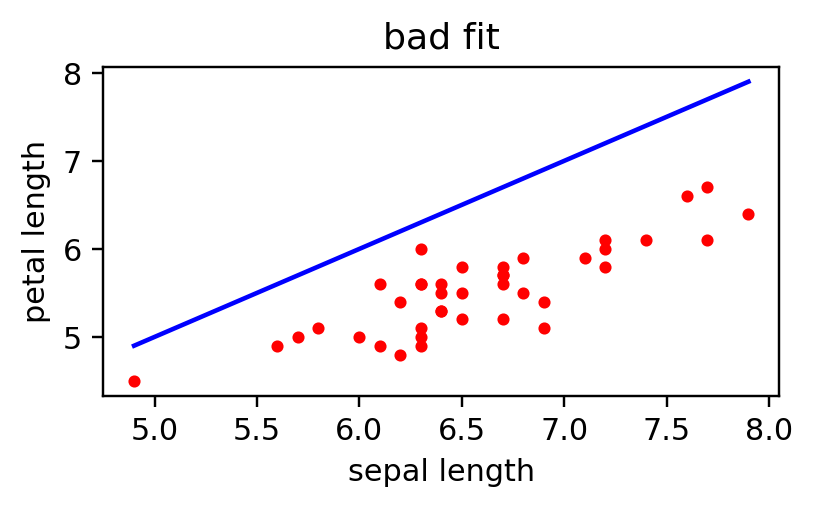

In [13]:
badfit = np.array([1.0, 0.0])
xline = np.linspace(min(virginica.sepal_length), max(virginica.sepal_length), 100)
yline = np.polyval(badfit, xline)

myplot(x=virginica_training.sepal_length, y=virginica_training.petal_length, pointstyle='r.',
       x2=xline, y2=yline, pointstyle2='b',
       xlabel='sepal length', ylabel='petal length', title='bad fit')

The performance (i.e. RMS error) of this bad fit on the training data is

In [14]:
performance(virginica_training.sepal_length, virginica_training.petal_length, badfit)

1.106119342566615

which looks about right, namely that the blue line is on average about 1 away from the red dots.

On the testing data it gives

In [15]:
performance(virginica_testing.sepal_length, virginica_testing.petal_length, badfit)

0.9869143833180264

about the same, which is good: the testing and training data are similar, and the performance doesn't depend on the sample size.

Now for a better fit.

In [16]:
fit1 = np.polyfit(virginica_training.sepal_length, virginica_training.petal_length, deg=1)
fit1

array([0.68402707, 1.02568177])

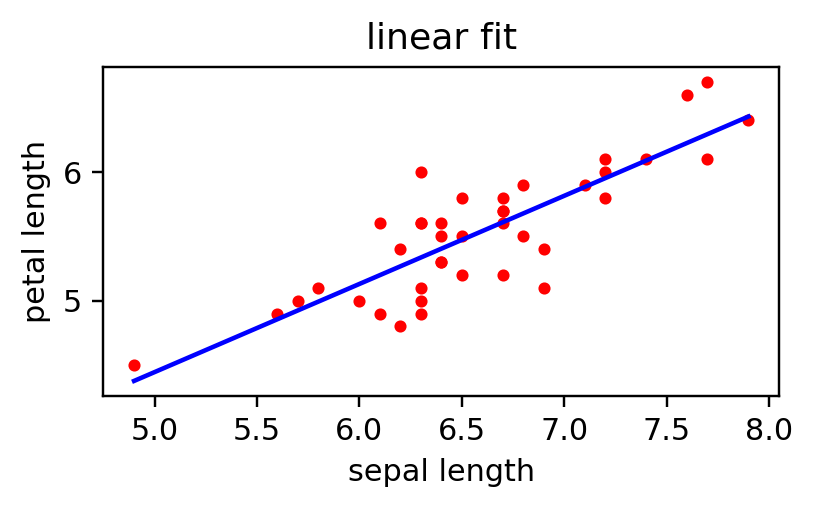

In [17]:
myplot(x=virginica_training.sepal_length, y=virginica_training.petal_length, pointstyle='r.',
       x2=xline, y2=np.polyval(fit1, xline), pointstyle2='b',
       xlabel='sepal length', ylabel='petal length', title='linear fit')

The perfomances on the training and testing sets are

In [18]:
perfs(virginica_training, virginica_testing, fit1)

(0.27194931169622105, 0.30426694656071085)

The performance of both the training and testing set is better. A visualization of the testing fit is

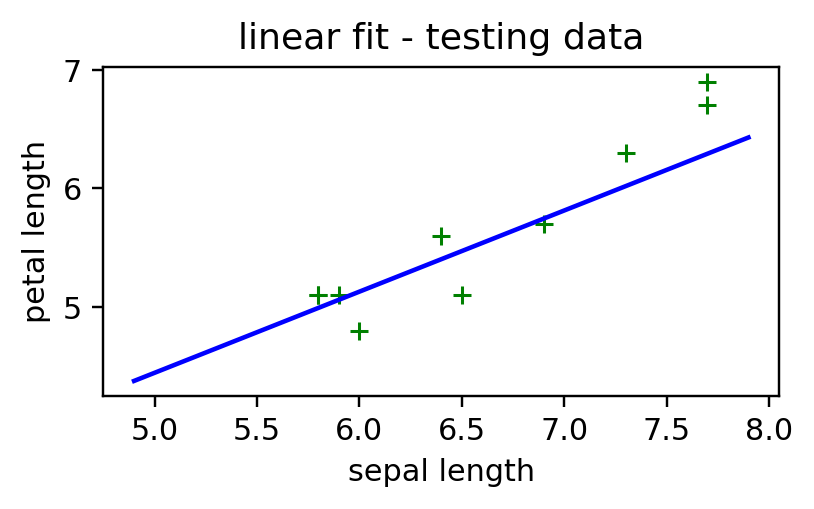

In [19]:
myplot(x=virginica_testing.sepal_length, y=virginica_testing.petal_length, pointstyle='g+',
       x2=xline, y2=np.polyval(fit1, xline), pointstyle2='b',
       xlabel='sepal length', ylabel='petal length', title='linear fit - testing data')

Now for an overfit. Let's do the same but with a degree 15 polynomial.

In [20]:
fit10 = np.polyfit(virginica_training.sepal_length, virginica_training.petal_length, deg=10)
fit10

array([-1.66819046e+00,  1.09251703e+02, -3.21115300e+03,  5.57795384e+04,
       -6.34119253e+05,  4.92959729e+06, -2.65387104e+07,  9.76947800e+07,
       -2.35343533e+08,  3.35003933e+08, -2.13974148e+08])

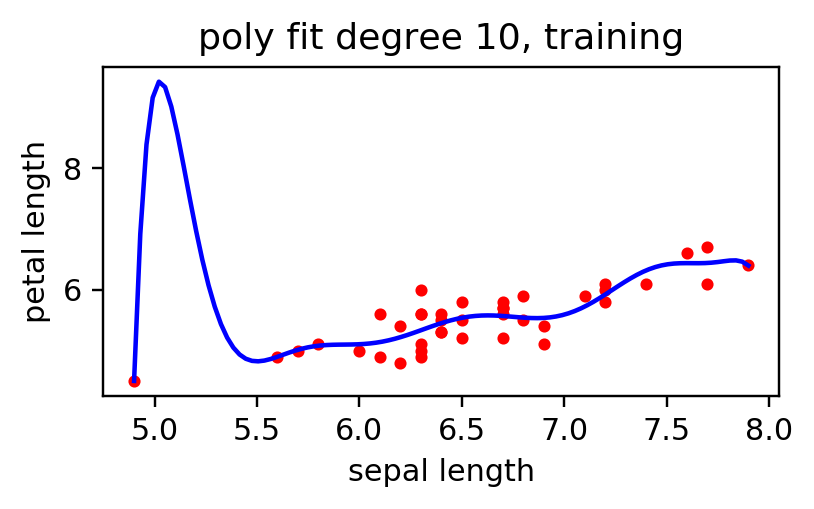

In [21]:
myplot(x=virginica_training.sepal_length, y=virginica_training.petal_length, pointstyle='r.',
       x2=xline, y2=np.polyval(fit10, xline), pointstyle2='b',
       xlabel='sepal length', ylabel='petal length', title='poly fit degree 10, training')

In [22]:
perfs(virginica_training, virginica_testing, fit10)

(0.2544331895767535, 0.2532113677863142)

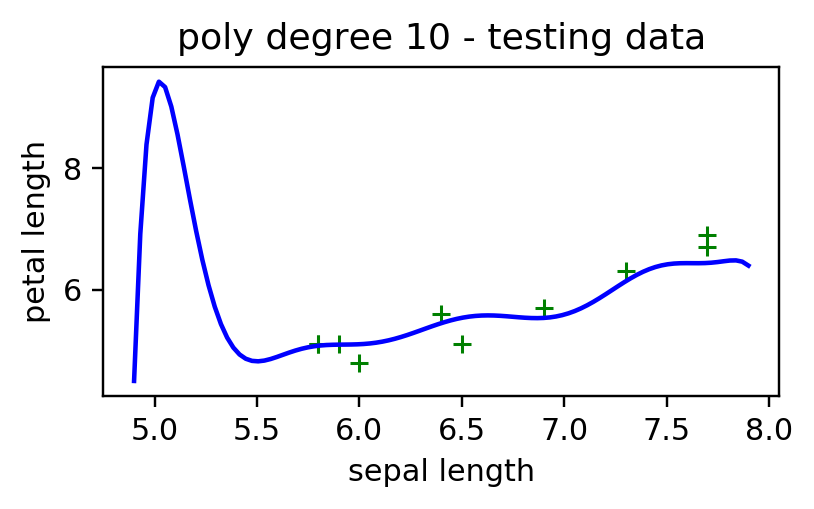

In [23]:
myplot(x=virginica_testing.sepal_length, y=virginica_testing.petal_length, pointstyle='g+',
       x2=xline, y2=np.polyval(fit10, xline), pointstyle2='b',
       xlabel='sepal length', ylabel='petal length', title='poly degree 10 - testing data')

This 10th degree poly gives marginally better performance on both the training and testing data.

However, the funny bump near x=5 makes it look pretty suspicious ... the linear fit is more believable.